In [18]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
root_dir = r"/mnt/d/Learning/WAI/ML_Summer/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered"

In [20]:
BATCH_SIZE  = 16
EPOCHS = 100
input_img_size = (128,128)
input_shape = (128,128,3)

In [21]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/test",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)

Found 2752 files belonging to 2 classes.
Found 248 files belonging to 2 classes.


In [23]:
# for images, labels in train_ds.take(1):
#     plt.figure(figsize=(5,5))
#     plt.imshow(images[0].numpy() / 255.)  # normalize if not already
#     plt.title(f"Label: {int(labels[0])}")   
#     plt.axis('off')
#     plt.show()
#     break

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout, BatchNormalization, Input

model = Sequential([

    Input(shape=input_shape),

    Conv2D(64, (3, 3), activation='relu', padding='same'),  # 1. Conv2D
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu',padding='same'),
    Conv2D(128, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(256, (3, 3), activation='relu',padding='same'),
    Conv2D(256, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(512, (3, 3), activation='relu',padding='same'),
    Conv2D(512, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dropout(dropout_rate),

    Dense(256, activation='relu'),
    Dropout(dropout_rate),


    Dense(128, activation='relu'),

    Dense(1, activation='sigmoid')  #

])

In [25]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        14,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,185 (98.38 KB)

 Trainable params: 25,185 (98.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5276 - loss: 9.7403 - val_accuracy: 0.5524 - val_loss: 0.7053
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5658 - loss: 0.9133 - val_accuracy: 0.5242 - val_loss: 0.6941
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5658 - loss: 0.7872 - val_accuracy: 0.5444 - val_loss: 0.6894
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5934 - loss: 0.7008 - val_accuracy: 0.5363 - val_loss: 0.6883
Epoch 5/100
115/172 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6278 - loss: 0.6754

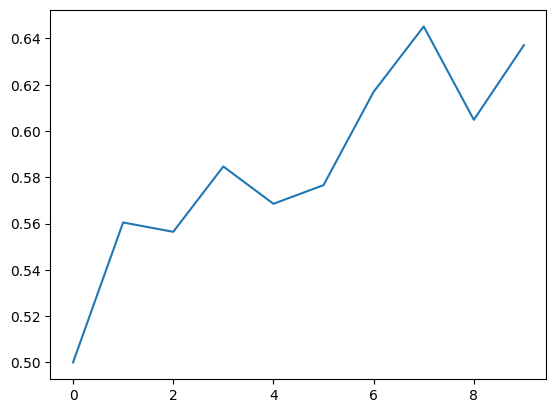

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(val_acc)

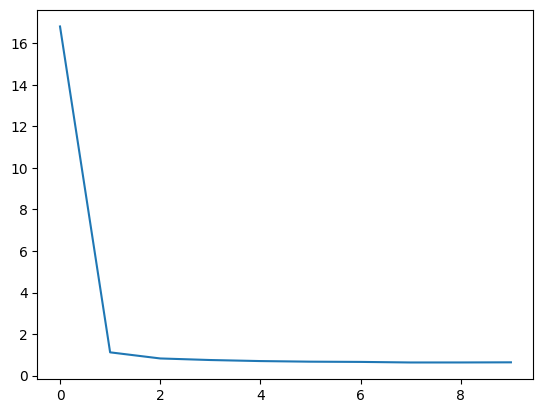

In [ ]:
plt.plot(loss)

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6371 - loss: 0.6487
Validation Loss: 0.6487
Validation Accuracy: 0.6371


In [ ]:
BATCH_SIZE
input_shape

(128, 128, 3)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/mnt/d/Learning/WAI/ML_Summer/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered/test/cats/cat.2366.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [ ]:
class_names = train_ds.class_names

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [ ]:
class_names

['cats', 'dogs']

In [ ]:
model.predict(img_array)[0][0]

NameError: name 'img_array' is not defined

In [ ]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

### Model Saving

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

In [ ]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [ ]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = train_ds.class_names

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
